In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Food_cost_train.csv',sep='	')

In [3]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

# There are null/missing values in  our dataset.

In [5]:
#Now we will replace missing value -by using- Simple Imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['CITY']=imp.fit_transform(df[['CITY']])

In [6]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['LOCALITY']=imp.fit_transform(df[['LOCALITY']])

In [7]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [8]:
df.shape

(12690, 9)

In [9]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              2
VOTES            1204
COST                0
dtype: int64

In [10]:
#Converting 'RATING' to numeric
df['RATING']= df['RATING'].apply (pd.to_numeric, errors='coerce')

In [11]:
df['VOTES'].dtypes

dtype('O')

In [12]:
#Removing Null Values from 'RATING'
im=SimpleImputer(missing_values=np.NaN,strategy='mean')
df['RATING']=im.fit_transform(df[['RATING']])

In [13]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1204
COST                0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [16]:
df.shape

(11486, 9)

# Therefore we have removed all the NULL VALUES

C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


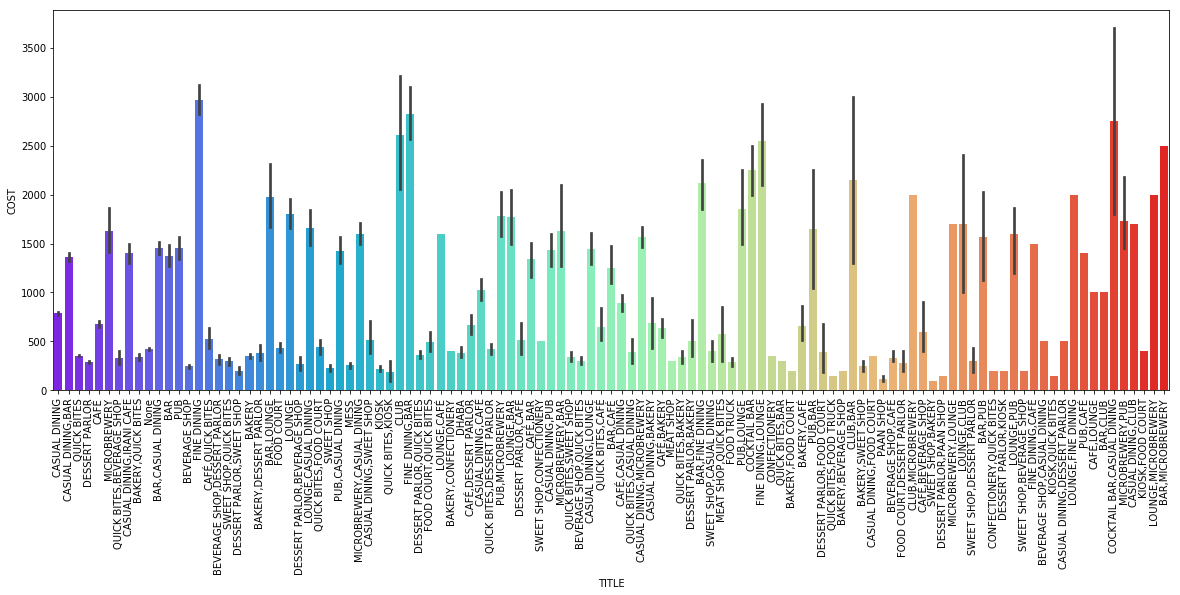

In [17]:
plt.figure(figsize=(20,7))
sns.barplot(x='TITLE',y='COST',data=df,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

-->'FINE DINNING','Club','Fine Dinning Bar','Fine Dinning Lounge' & 'Cocktail bar,Casual Dinning' are most expensive.      
-->'Paan shop' & 'Sweet shop,bakery' are cheapest among all.

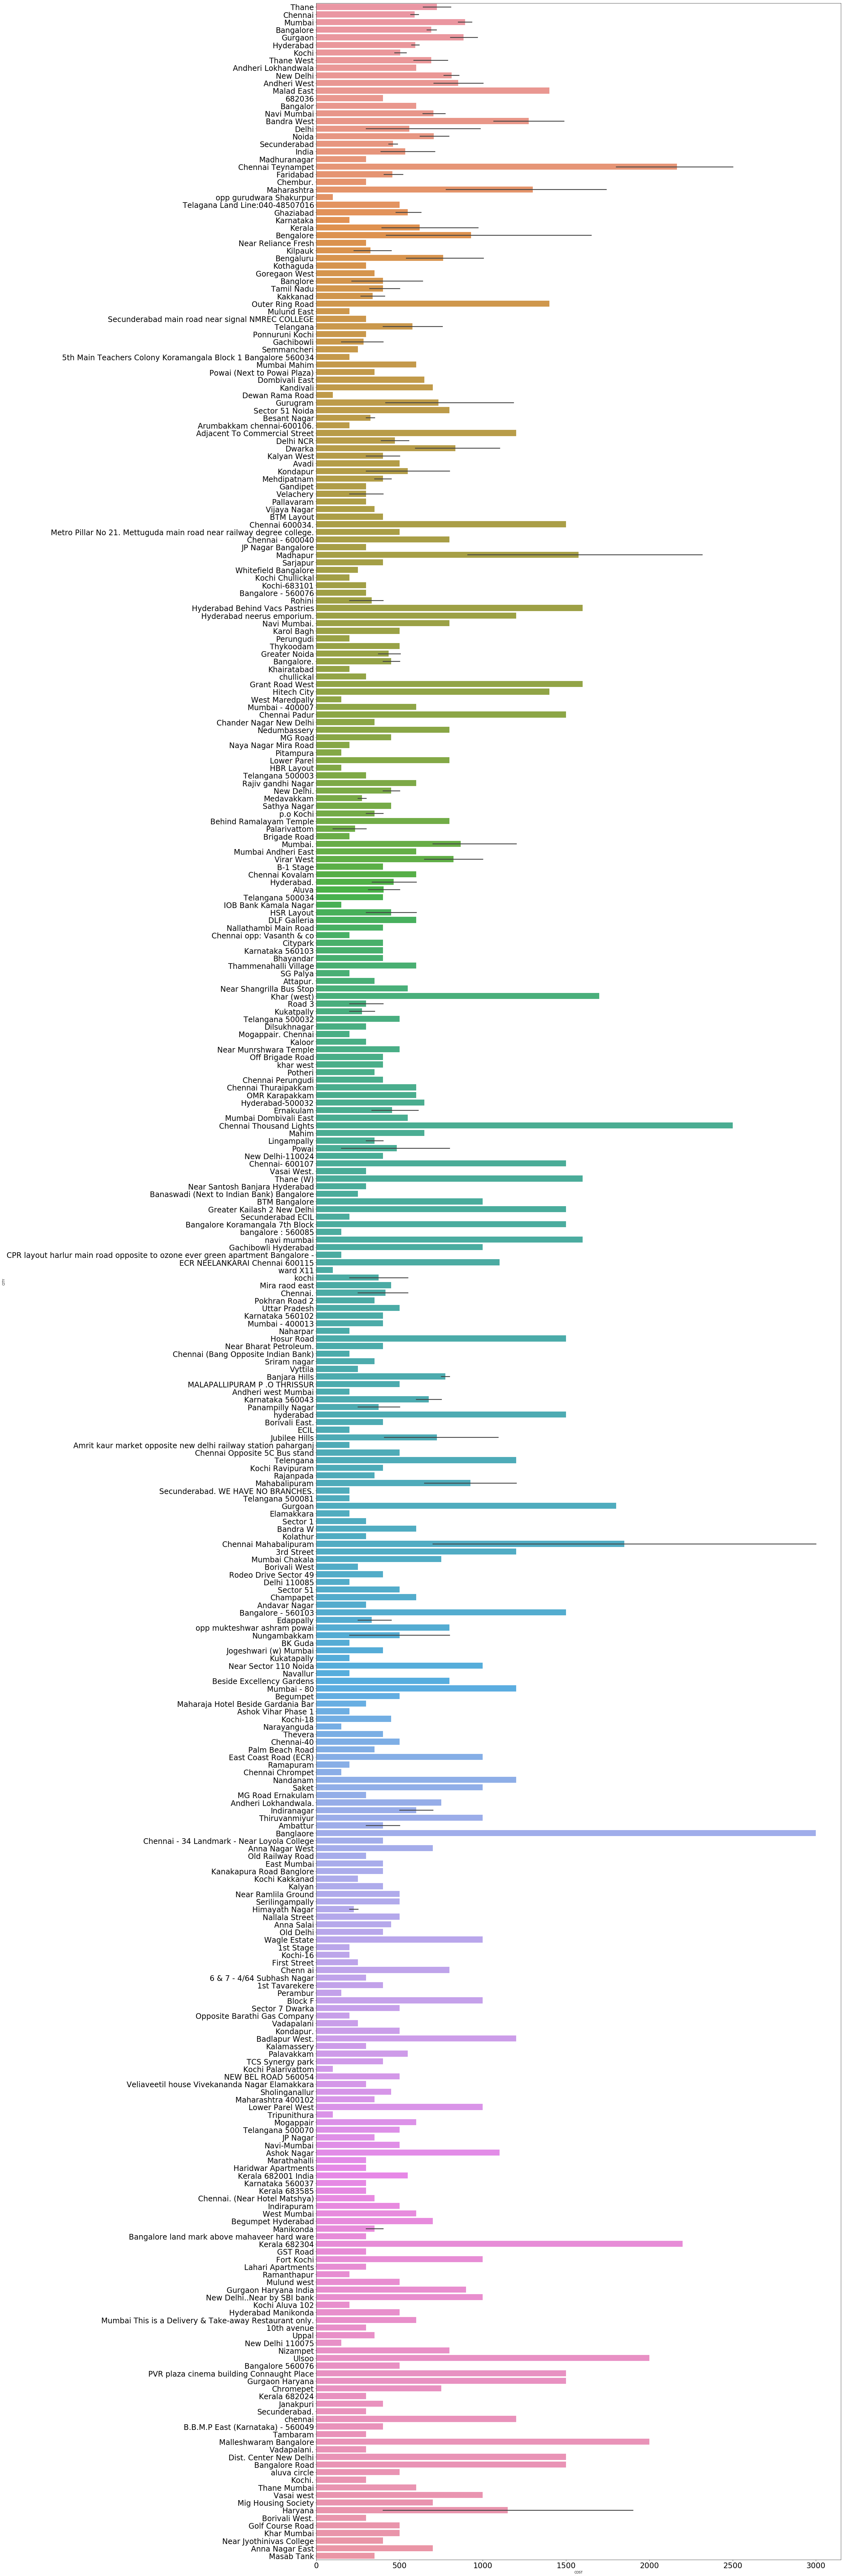

In [18]:
plt.figure(figsize=(30,150))
sns.barplot(x='COST',y='CITY',data=df,orient ='h')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

# Here we can see that CHENNAI,BANGALORE & Kerala are the most expensive 'CITY' interms of FOOD cost.

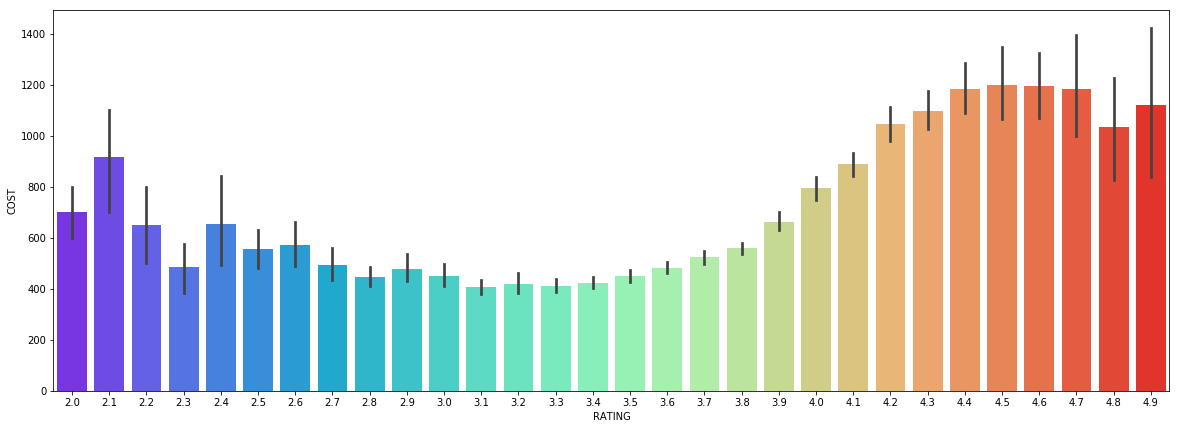

In [19]:
plt.figure(figsize=(20,7))
sns.barplot(x='RATING',y='COST',data=df,palette='rainbow')
plt.show()

# Here we can see that, as the rating is increasing towards '5' cost is also increasing.i.e, they have +ve correlation.

In [20]:
df['RATING']= df['RATING'].apply (pd.to_numeric, errors='coerce')

In [21]:
# Converting CATEGORICAL DATA into Numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lis=['TITLE','CUISINES','TIME','CITY','LOCALITY','VOTES']
for i in lis:
    df[i] = le.fit_transform(df[i])

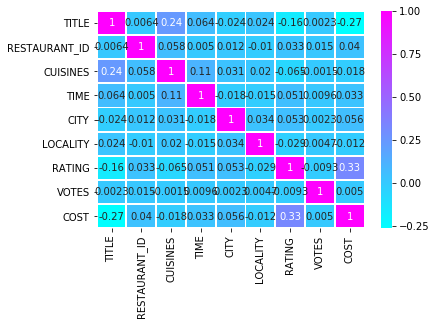

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='cool',lw=1)

-->Rating is having weak +ve correlation with COST                                  
-->TITLE is having -ve correlation with COST

In [23]:
df.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000
mean,57.088804,7789.993557,2124.253961,1121.089152,131.373324,604.257879,3.785452,969.372366,681.896309
std,32.264824,4508.809616,1146.815622,712.673949,79.245918,368.149663,0.422089,502.105893,645.571594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,50.000000
25%,29.000000,3880.250000,1124.000000,529.000000,63.000000,313.000000,3.500000,569.000000,300.000000
50%,51.000000,7807.500000,2271.500000,1082.000000,125.000000,540.500000,3.800000,1021.000000,500.000000
75%,93.000000,11726.750000,3070.000000,1757.750000,206.000000,932.000000,4.100000,1381.000000,800.000000
max,110.000000,15573.000000,3945.000000,2565.000000,335.000000,1314.000000,4.900000,1846.000000,14000.000000


--->Average cost for FOOD is 681.9.                      
--->Min. cost for FOOD is 50.                       
--->Max. cost for FOOD is 14000.

In [24]:
df.skew()

TITLE           -0.005125
RESTAURANT_ID   -0.006127
CUISINES        -0.211013
TIME             0.306117
CITY             0.309170
LOCALITY         0.348344
RATING          -0.511232
VOTES           -0.186413
COST             3.900207
dtype: float64

# Therefore there in no skewness in our data, except TARGET(COST).

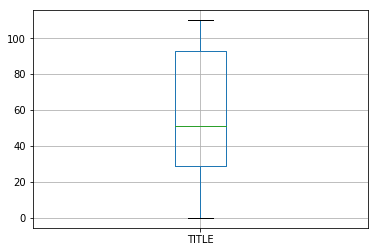

In [25]:
#Checking for OUTLIERS, in 'TITLE'
df.boxplot('TITLE')

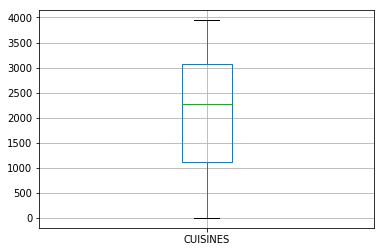

In [26]:
#Checking for OUTLIERS, in 'CUISINES'
df.boxplot('CUISINES')

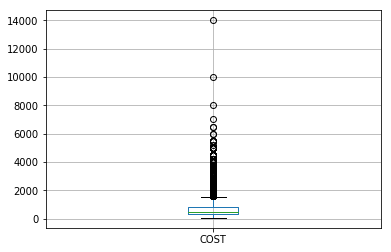

In [27]:
#Checking for OUTLIERS, in 'COST'
df.boxplot('COST')

# There are few OUTLIERS in our dataset.

In [28]:
#NOW we will remove the OUTLIERS
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.8706084 , 0.36552401, 0.31457694, ..., 0.43938568, 0.61469318,
        0.80258526],
       [0.80861869, 1.19948331, 1.60909414, ..., 0.98217685, 0.03858391,
        1.26730995],
       [0.8706084 , 0.69311919, 0.60931892, ..., 0.0344685 , 0.51260815,
        0.18295234],
       ...,
       [0.3691858 , 0.74147109, 0.12579201, ..., 0.50832267, 0.91344795,
        0.95749349],
       [0.8706084 , 0.36729554, 1.05491997, ..., 0.67631277, 0.05303422,
        0.43668058],
       [0.8706084 , 0.30164342, 0.58315839, ..., 0.91323985, 1.06680873,
        0.12686412]])

In [29]:
threshold=3
print(np.where(z>3))

(array([   81,   151,   196,   287,   315,   354,   391,   429,   460,
         518,   552,   617,   673,   766,   885,   886,   892,   922,
         932,  1038,  1092,  1229,  1275,  1345,  1348,  1454,  1490,
        1511,  1603,  1616,  1621,  1655,  1666,  1713,  1747,  1761,
        1762,  1802,  1891,  1918,  1928,  2001,  2017,  2134,  2140,
        2149,  2167,  2246,  2273,  2312,  2375,  2381,  2391,  2449,
        2455,  2460,  2502,  2536,  2667,  2684,  2709,  2713,  2739,
        2770,  2782,  2886,  2910,  2919,  2924,  3012,  3041,  3092,
        3093,  3167,  3175,  3176,  3205,  3207,  3211,  3230,  3277,
        3354,  3356,  3367,  3378,  3391,  3425,  3484,  3523,  3528,
        3536,  3570,  3581,  3590,  3661,  3755,  3760,  3828,  3873,
        3879,  3884,  3896,  3911,  3919,  3982,  3990,  3998,  4074,
        4103,  4133,  4137,  4142,  4229,  4262,  4275,  4293,  4447,
        4471,  4544,  4621,  4628,  4651,  4688,  4714,  4772,  4897,
        5014,  5068

In [30]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(11486, 9)
(11206, 9)


# Therefore we have removed OUTLIERS

In [31]:
df=df_new

In [32]:
#Segregating the data for Model Training
df_x=df.drop('COST',axis=1)
y=df['COST']
print(df_x.shape)
print(y.shape)

(11206, 8)
(11206,)


In [33]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [35]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (7844, 8)
y_train: (7844,)
x_test: (3362, 8)
y_test: (3362,)


In [36]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [37]:
#Selecting the best algorithm for our dataset
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),SVR(),KNeighborsRegressor(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is:
Score: [0.22708379 0.22085367 0.23513652 0.23528775]
Mean Score: 0.22959043123525202
standard deviation: 0.006038061181379761




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is:
Score: [0.1248742  0.13042465 0.10818854 0.10274074]
Mean Score: 0.11655703357818395
standard deviation: 0.011428120923994938


Score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is:
Score: [0.32166211 0.28990398 0.31237252 0.33719907]
Mean Score: 0.315284420387893
standard deviation: 0.017128724077919995


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) is:
Score: [0.22708536 0.22085808 0.23513577 0.23528427]
Mean Score: 0.22959087044526186
standard deviation: 0.006035314751413558


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False

# Therefore we will use  DecisionTreeRegressor as it is having highest mean score i.e,39

In [38]:
#Now we will find the best parameters for our model
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeRegressor()
parameters={'criterion':['mse', 'friedman_mse', 'mae'],'splitter':['best', 'random'],'max_features':['auto','sqrt','log2']}
clf=GridSearchCV(DT,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}

In [60]:
DT=DecisionTreeRegressor(criterion='mse',max_features='auto',splitter='best')

In [61]:
DT.fit(x_train,y_train)
DT.score(x_train,y_train)

1.0

In [62]:
pred=DT.predict(x_test)

In [63]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Square error:',mean_squared_error(y_test,pred))
print('R2 Score:',r2_score(y_test,pred))

Mean Absolute error: 239.69095776323616
Mean Square error: 127872.04074955384
R2 Score: 0.40521280676800064


In [64]:
#We will try ensemble technique to boost our model
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf=RandomForestRegressor()

In [66]:
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9407861133184239


In [67]:
pred2=rf.predict(x_test)

In [68]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred2))
print('Mean Square error:',mean_squared_error(y_test,pred2))
print('R2 Score:',r2_score(y_test,pred2))

Mean Absolute error: 183.08132064247474
Mean Square error: 72108.18085663296
R2 Score: 0.6645942127037512


# Therefore after using RandomForestRegressor we are getting better R2 score i.e,66.4.

In [48]:
#Now we will save our best MODEL
import pickle
filename='model.pkl'
pickle.dump(rf,open(filename,'wb'))

# NOW WE WILL USE OUR TEST DATA FOR Predicting OUTPUT

In [49]:
#Importing the TEST DATA
test_df=pd.read_csv('Food_cost_test.csv',sep='	')

In [50]:
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [51]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [52]:
test_df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [53]:
#REPLACING the NULL values
im1=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
test_df['CITY']=im1.fit_transform(test_df[['CITY']])
test_df['LOCALITY']=im1.fit_transform(test_df[['LOCALITY']])
test_df['RATING']=im1.fit_transform(test_df[['RATING']])
test_df['VOTES']=im1.fit_transform(test_df[['VOTES']])

In [54]:
test_df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

# Therefore we have removed the NULL values from our TEST DATA.

In [55]:
#Loading our best saved MODEL for PREDICTION PHASE
fitted_model=pickle.load(open("model.pkl",'rb'))

In [56]:
fitted_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
# Converting CATEGORICAL DATA into Numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lis=['TITLE','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES']
for i in lis:
    test_df[i] = le.fit_transform(test_df[i])

In [58]:
#Prediction on TEST DATA
pred2=fitted_model.predict(test_df)

In [59]:
pred2

array([395., 395., 395., ..., 395., 320., 395.])